In [12]:
import numpy as np

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [13]:
inputs = Input((1, ))
h2 = Dense(8, activation='relu')(inputs)
h3 = Dense(16, activation='sigmoid')(h2)
h4 = Dense(4, activation='sigmoid')(h3)
output = Dense(1)(h4)

model = Model(inputs=inputs, outputs=output)
model.summary(show_trainable=True)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_4 (Dense)             │ (None, 8)             │         16 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_5 (Dense)             │ (None, 16)            │        144 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_6 (Dense)             │ (None, 4)             │         68 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_7 (Dense)             │ (None, 1)             │          5 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 233 (932.00 B)

 Trainable params: 233 (932.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
def func(x):
    return 7 * x ** 4 + 5 * x ** 3 + 2 * x ** 2 - 7 * x + 10

In [15]:
def create_data_points(func, x_range, num_points):
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    y_values = func(x_values)
    return x_values, y_values

In [16]:
x, y = create_data_points(func, x_range=(-2, 2), num_points=1000)

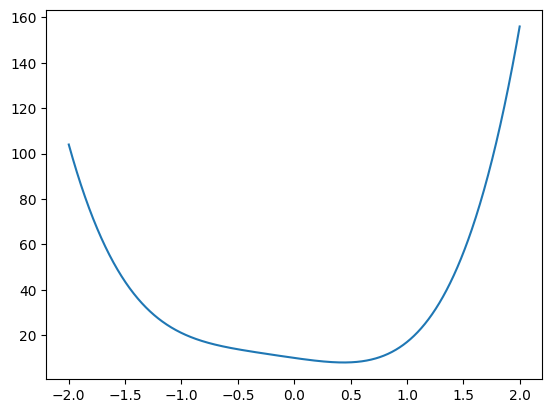

In [ ]:
plt.plot(x, y)
plt.show()

In [18]:
total_n = len(x)
train_n = int(total_n * 0.7)
val_n = int(total_n * 0.1)
test_n = total_n - train_n - val_n

x_train, y_train = x[:train_n], y[:train_n]
x_val, y_val = x[train_n:train_n + val_n], y[train_n:train_n + val_n]
x_test, y_test = x[train_n + val_n:], y[train_n + val_n:]

In [19]:
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1182.7281 - val_loss: 329.4408
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1172.3672 - val_loss: 322.6223
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1162.0521 - val_loss: 316.0518
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1152.1790 - val_loss: 309.8229
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1142.9130 - val_loss: 303.9530
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1134.2100 - val_loss: 298.6362
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1126.2725 - val_loss: 293.8390
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1119.2113 - val_loss: 289.3608
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1112.6757 - val_loss: 285.3272
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1106.7705 - val_loss: 281.6192
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1101.3865 - val_loss: 278.1534
Epoch 1